In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

### Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#convert the Total charges column to numeric (float) and fill any missing value with the mean.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [7]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

string_columns = list(data.dtypes[data.dtypes == 'object'].index)

for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [8]:
data.churn = (data.churn == 'yes').astype(int)

In [9]:
data.drop('customerid', axis=1, inplace=True)

In [10]:
data.head().T

,0,1,2,3,4
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no
onlinebackup,yes,no,yes,no,no


### Exploratory data analysis

In [11]:
data.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [12]:
data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [13]:
data.value_counts('churn')

,count
churn,
0,5174
1,1869


In [14]:
# To get the churn rate
data_churn_rate = data.churn.mean()
round(data_churn_rate, 2)

0.27

##### 27% of the customers in this data actually churned

In [15]:
data.dtypes

,0
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object
onlinebackup,object


In [16]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [17]:
data[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


#### **Feature Importance**

##### Churn rate

In [18]:
data_churn_rate

0.2653698707936959

In [19]:
data.groupby('gender').churn.mean()

,churn
gender,
female,0.269209
male,0.261603


In [20]:
data.groupby('partner').churn.mean()

,churn
partner,
no,0.329580
yes,0.196649


In [21]:
data.groupby('paymentmethod').churn.mean()

,churn
paymentmethod,
bank_transfer_(automatic),0.167098
credit_card_(automatic),0.152431
electronic_check,0.452854
mailed_check,0.191067


In [22]:
data.groupby('contract').churn.mean()

,churn
contract,
month-to-month,0.427097
one_year,0.112695
two_year,0.028319


In [23]:
data.groupby('internetservice').churn.mean()

,churn
internetservice,
dsl,0.189591
fiber_optic,0.418928
no,0.074050


In [24]:
data.groupby('techsupport').churn.mean()

,churn
techsupport,
no,0.416355
no_internet_service,0.074050
yes,0.151663


In [25]:
data.groupby('streamingmovies').churn.mean()

,churn
streamingmovies,
no,0.336804
no_internet_service,0.074050
yes,0.299414


In [26]:
data.groupby('streamingtv').churn.mean()

,churn
streamingtv,
no,0.335231
no_internet_service,0.074050
yes,0.300702


In [27]:
data.groupby('paperlessbilling').churn.mean()

,churn
paperlessbilling,
no,0.163301
yes,0.335651


If the difference between the data_churn_rate and the group churn rate is > 0, then the group is less likely to church but if it is < 0, then the group is more likely to churn

#### Risk Ratio

Risk ratio = Group/data_churn_rate
If it is > 1 then the group is more likely to churn but if it is < 1 then they are less likely to churn.

In [28]:
from IPython.display import display

In [29]:
for col in categorical:
    print(col)
    df_group = data.groupby(by=col).churn.agg(['mean', 'count'])
    df_group['diff'] = data_churn_rate - df_group['mean']
    df_group['risk'] = df_group['mean'] / data_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.269209,3488,-0.003839,1.014466
male,0.261603,3555,0.003766,0.985807



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236062,5901,0.029308,0.889557
1,0.416813,1142,-0.151443,1.570686



partner


,mean,count,diff,risk
partner,,,,
no,0.329580,3641,-0.064210,1.241964
yes,0.196649,3402,0.068721,0.741038



dependents


,mean,count,diff,risk
dependents,,,,
no,0.312791,4933,-0.047422,1.178700
yes,0.154502,2110,0.110868,0.582215



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.249267,682,0.016103,0.939319
yes,0.267096,6361,-0.001726,1.006506



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.250442,3390,0.014927,0.943749
no_phone_service,0.249267,682,0.016103,0.939319
yes,0.286099,2971,-0.020729,1.078114



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.189591,2421,0.075779,0.714441
fiber_optic,0.418928,3096,-0.153558,1.578656
no,0.074050,1526,0.191320,0.279044



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.417667,3498,-0.152297,1.573906
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.146112,2019,0.119258,0.550597



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.399288,3088,-0.133918,1.504645
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.215315,2429,0.050055,0.811377



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.391276,3095,-0.125906,1.474456
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.225021,2422,0.040349,0.847951



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.416355,3473,-0.150985,1.568960
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.151663,2044,0.113706,0.571517



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335231,2810,-0.069861,1.263261
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.300702,2707,-0.035332,1.133143



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.336804,2785,-0.071434,1.269188
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.299414,2732,-0.034044,1.128291



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.427097,3875,-0.161727,1.609440
one_year,0.112695,1473,0.152675,0.424672
two_year,0.028319,1695,0.237051,0.106714



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.163301,2872,0.102069,0.615371
yes,0.335651,4171,-0.070281,1.264842



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,0.098271,0.629681
credit_card_(automatic),0.152431,1522,0.112939,0.574410
electronic_check,0.452854,2365,-0.187484,1.706502
mailed_check,0.191067,1612,0.074303,0.720003


#### Mutual Information
This tells us how much we can learn about one variable if we know the value of another. It measures the relationship between two variables and the higher the mutual information, the stronger the relationship.

In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
def calculate_mi(series):
    return mutual_info_score(series, data.churn)

df_mi = data[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='Mutual_info')


display(df_mi)

,Mutual_info
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


#### Correlation
It is a statistical measure used to identify relationships between variables, to predict the value of one variable based on the value of another, and to test hypotheses about relationships between variables.
A positive correlation indicates that the variables move in the same direction, while a negative correlation indicates that they move in opposite directions. A correlation of 0 indicates that there is no relationship between the variables.

In [32]:
data[numerical].corrwith(data.churn).to_frame('correlation')

,correlation
tenure,-0.352229
monthlycharges,0.193356
totalcharges,-0.199428


#### **Feature Encoding**

In [33]:
# Getting all the unique values for the categorical columns
def get_unique(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def nominal_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

# Define the feature categories and orderings
binary_features = ['gender', 'partner', 'dependents', 'phoneservice',
                   'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                   'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']
ordinal_features = ['internetservice', 'contract']
nominal_features = ['paymentmethod']

internet_ordering = ['no', 'dsl', 'fiber_optic']
contract_ordering = ['month-to-month', 'one_year', 'two_year']

# Create a function to apply transformations
def process_data(df):
    # Replace values
    df['multiplelines'] = df['multiplelines'].replace('no_phone_service', 'no')
    df[['onlinesecurity', 'onlinebackup', 'deviceprotection',
        'techsupport', 'streamingtv', 'streamingmovies']] = df[['onlinesecurity', 'onlinebackup', 'deviceprotection',
                                                                'techsupport', 'streamingtv', 'streamingmovies']].replace('no_internet_service', 'no')

    # Binary encoding
    df = binary_encode(df, 'gender', 'male')
    for feature in binary_features:
        df = binary_encode(df, feature, 'yes')

    # Ordinal encoding
    df = ordinal_encode(df, 'internetservice', internet_ordering)
    df = ordinal_encode(df, 'contract', contract_ordering)

    # Nominal encoding
    df = nominal_encode(df, 'paymentmethod')

    return df



# Get unique values for the categorical columns (if needed)
unique_values_train = get_unique(data, get_categorical_columns(data))
print(unique_values_train)


{'gender': ['female', 'male'], 'partner': ['yes', 'no'], 'dependents': ['no', 'yes'], 'phoneservice': ['no', 'yes'], 'multiplelines': ['no_phone_service', 'no', 'yes'], 'internetservice': ['dsl', 'fiber_optic', 'no'], 'onlinesecurity': ['no', 'yes', 'no_internet_service'], 'onlinebackup': ['yes', 'no', 'no_internet_service'], 'deviceprotection': ['no', 'yes', 'no_internet_service'], 'techsupport': ['no', 'yes', 'no_internet_service'], 'streamingtv': ['no', 'yes', 'no_internet_service'], 'streamingmovies': ['no', 'yes', 'no_internet_service'], 'contract': ['month-to-month', 'one_year', 'two_year'], 'paperlessbilling': ['yes', 'no'], 'paymentmethod': ['electronic_check', 'mailed_check', 'bank_transfer_(automatic)', 'credit_card_(automatic)']}


In [34]:
# Apply the function to data
data = process_data(data)

In [35]:
data.head().T

,0,1,2,3,4
gender,0.00,0.00,0.00,0.00,0.00
seniorcitizen,0.00,0.00,0.00,0.00,0.00
partner,1.00,0.00,0.00,0.00,0.00
dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
phoneservice,0.00,1.00,1.00,0.00,1.00
multiplelines,0.00,0.00,0.00,0.00,0.00
internetservice,1.00,1.00,1.00,1.00,2.00
onlinesecurity,0.00,1.00,1.00,1.00,0.00
onlinebackup,1.00,0.00,1.00,0.00,0.00


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   int64  
 1   seniorcitizen              7043 non-null   int64  
 2   partner                    7043 non-null   int64  
 3   dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   phoneservice               7043 non-null   int64  
 6   multiplelines              7043 non-null   int64  
 7   internetservice            7043 non-null   int64  
 8   onlinesecurity             7043 non-null   int64  
 9   onlinebackup               7043 non-null   int64  
 10  deviceprotection           7043 non-null   int64  
 11  techsupport                7043 non-null   int64  
 12  streamingtv                7043 non-null   int64  
 13  streamingmovies            7043 non-null   int64

In [37]:
data['churn'].value_counts()

,count
churn,
0,5174
1,1869


In [38]:
X = data.drop('churn', axis=1)
y = data['churn']

### **Model Building**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import tensorflow as tf

In [40]:
#splitting the dataset in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [41]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [42]:
#feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test_scaled)

#### Logistic Regression Model

In [43]:
lr_model = LogisticRegression(solver='liblinear', random_state=1)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [44]:
lr_y_pred = lr_model.predict_proba(X_test_scaled)[:, 1]

In [45]:
churn_decision = (lr_y_pred >= 0.5)

In [46]:
(y_test == churn_decision).mean()

0.7835344215755855

#### XGBoost Model

In [47]:
clf_random = XGBClassifier()

In [48]:
params = {
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth':[3, 4, 5, 6, 7, 8, 10, 12, 15],
 'gamma':[0, 0.1, 0.2, 0.3, 0.4, 0.9],
 'colsample_bytree':[0.3, 0.4, 0.5, 0.7],
 'reg_alpha':[0, 0.001, 0.01, 0.05],
 'min_child_weight':[1, 3, 5, 7]
}


In [49]:
random_search = RandomizedSearchCV(clf_random, param_distributions=params, n_iter=5, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3)

In [50]:
X_train_boost = X_train.copy()
X_test_boost = X_test.copy()

In [51]:
random_search.fit(X_train_boost, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'reg_alpha': [0, 0.001, 0.01, 0.05]},
                   scoring='roc_auc', verbose=3)

In [52]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
random_search.best_params_

{'reg_alpha': 0.05,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.9,
 'colsample_bytree': 0.7}

In [54]:
clf = XGBClassifier(learning_rate =0.3,
 max_depth=3,
 min_child_weight=1,
 gamma=0.3,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 reg_alpha= 0.01
 )

In [55]:
score = cross_val_score(clf, X_train_boost, y_train, cv=10)
score

array([0.80851064, 0.81028369, 0.78368794, 0.82092199, 0.8277087 ,
       0.78685613, 0.80461812, 0.79040853, 0.78685613, 0.80994671])

In [56]:
score.mean()

0.802979857148256

#### TensorFlow Model

In [57]:
inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size = 64
epochs = 5

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

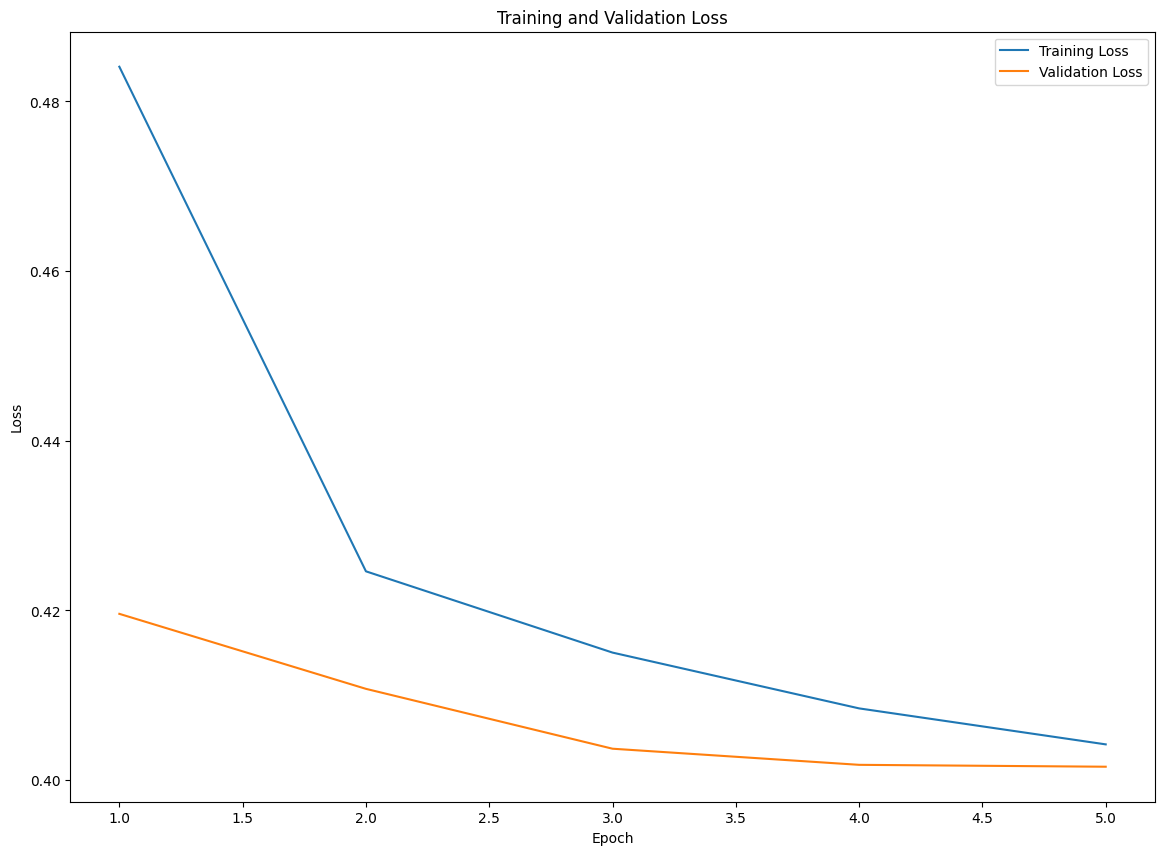

In [58]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [59]:
model.evaluate(X_test_scaled, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8406 - loss: 0.4203


[0.4405190050601959, 0.8228848576545715]

From the above model building and evaluation, the TensorFlow model performed better than the XGBoost and Logistic Regression models. However, these models can be improved upon by further Hyperparameter tuning and more feature engineering or getting more data.